## Actividad 07 - Máquina de soporte vectorial

- Ignacio David Vázquez Pérez
- AI 2
- 218292866

Máquina de soporte vectorial

- Programa un clasificador binario con una SVM usando la biblioteca cvxopt
- Resuelve los problemas de clasificación propuesto en el archivo "SVM_test.py"
- Usando el script "plotting.py" dibuja la superficie de decisión y los margenes de la SVM.
- Prueba diferentes hiperparámetros para C, gamma y degree
- Recopila tu código y resultados en formato PDF.

In [48]:
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.pipeline import Pipeline
# Optimisation
import cvxopt
import cvxopt.solvers
from SVM import *
from plotting import *

In [45]:
#entrenamiento cross-validation con hiperparámetros de SVC
def gridsearchcv(X, y, scoring = 'f1_macro', n_iter = 10, kernel = 'all'):
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, stratify=y, shuffle=True)
    pipe_steps = [('scaler', StandardScaler()), ('SupVM', SVC())]
    if kernel == 'all':
            param_grid= {
                    'SupVM__kernel' : ['rbf', 'poly','linear', 'sigmoid'],
                    'SupVM__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000], 
                    'SupVM__gamma' : [0.0001, 0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50],
                    'SupVM__degree': [1,2,3,4,5]
                    }

    else:
            param_grid= {
                    'SupVM__kernel' : [kernel],
                    'SupVM__C': [0.1, 0.5, 1, 10, 30, 40, 50, 75, 100, 500, 1000], 
                    'SupVM__gamma' : [0.0001, 0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50],
                    'SupVM__degree': [1,2,3,4,5]
        }

    pipeline = Pipeline(pipe_steps)
    grid = RandomizedSearchCV(
            pipeline,
            param_grid,
            refit = True,
            verbose = 1,
            n_jobs=-1,
            scoring = scoring,
            n_iter = n_iter        
            )
    grid.fit(X_train, Y_train)
    print("Best-Fit Parameters From Training Data:\n",grid.best_params_)
    grid_predictions = grid.predict(X_test) 
    report = classification_report(Y_test, grid_predictions, output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)
    print(confusion_matrix(Y_test, grid_predictions))
    return grid, report, X_train, X_test, Y_train, Y_test

In [11]:
def plot_svm_2d(grid, X_train, y_train):
    scaler1 = StandardScaler()
    scaler1.fit(X_train)
    X_train_scaled = scaler1.transform(X_train)

    svc_model = SVC(
        kernel= grid.best_params_['SupVM__kernel'],
        C=float(grid.best_params_['SupVM__C']), 
        gamma=float(grid.best_params_['SupVM__gamma'])
        )
    #######
    svc_model.fit(X_train_scaled, y_train)
    ####################
    fig, ax = plt.subplots(figsize=(12,9))
    fig.patch.set_facecolor('white')
    #################
    # Plotting our two-features-space
    sns.scatterplot(x=X_train_scaled[:, 0], 
                    y=X_train_scaled[:, 1], 
                    hue=y_train,
                    palette=['blue', 'red'], 
                    s=8,
                    ax = ax)

    # Encircle support vectors
    ax.scatter(svc_model.support_vectors_[:, 0],
                svc_model.support_vectors_[:, 1], 
                s=100, 
                facecolors='orange', 
                edgecolors='k', 
                alpha=.5)
    ####################
    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    def make_meshgrid(x, y, h=.1):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                np.arange(y_min, y_max, h))
        return xx, yy

    X0, X1 = X_train_scaled[:, 0], X_train_scaled[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, svc_model, xx, yy,cmap='seismic', alpha=0.4)
    ########################


## Problema 1

In [66]:
# Problema 1
np.random.seed(24)
mean1 = np.array([0, 2])
mean2 = np.array([2, 0])
cov = np.array([[1.5, 1], [1, 1.5]])
X1 = np.random.multivariate_normal(mean1, cov, 100)
X2 = np.random.multivariate_normal(mean2, cov, 100)
x = np.vstack((X1, X2))
y = np.hstack((np.ones(len(X1)), np.ones(len(X1))*-1))

<AxesSubplot:>

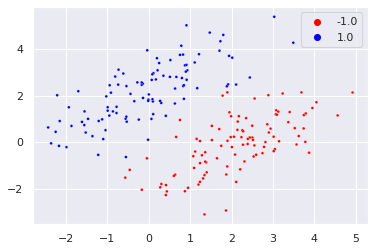

In [67]:
sns.scatterplot(x=x[:, 0], 
                y=x[:, 1], 
                hue=y, 
                s=8,
                palette=['red','blue']
                )

### sigmoid

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'sigmoid', 'SupVM__gamma': 0.005, 'SupVM__degree': 1, 'SupVM__C': 0.5}
              precision  recall  f1-score  support
-1.0                1.0     1.0       1.0     20.0
1.0                 1.0     1.0       1.0     20.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     40.0
weighted avg        1.0     1.0       1.0     40.0
[[20  0]
 [ 0 20]]


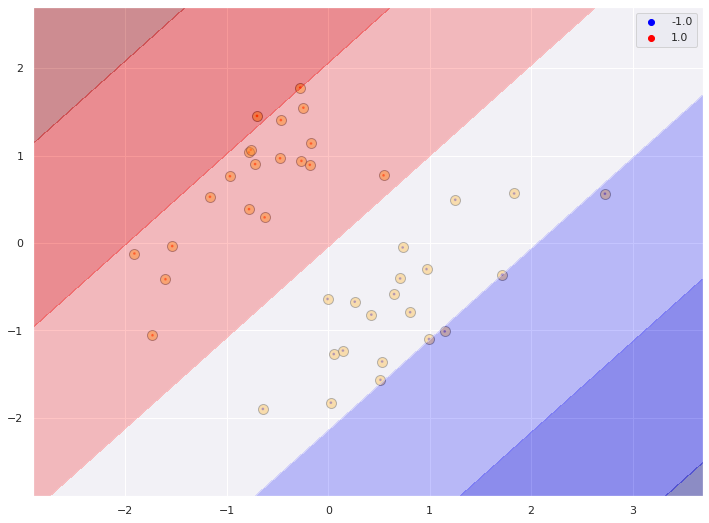

In [21]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 10, kernel = 'sigmoid')
plot_svm_2d(grid, X_test, Y_test)

### poly

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'poly', 'SupVM__gamma': 0.07, 'SupVM__degree': 1, 'SupVM__C': 0.1}
              precision  recall  f1-score  support
-1.0                1.0     1.0       1.0     20.0
1.0                 1.0     1.0       1.0     20.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     40.0
weighted avg        1.0     1.0       1.0     40.0
[[20  0]
 [ 0 20]]


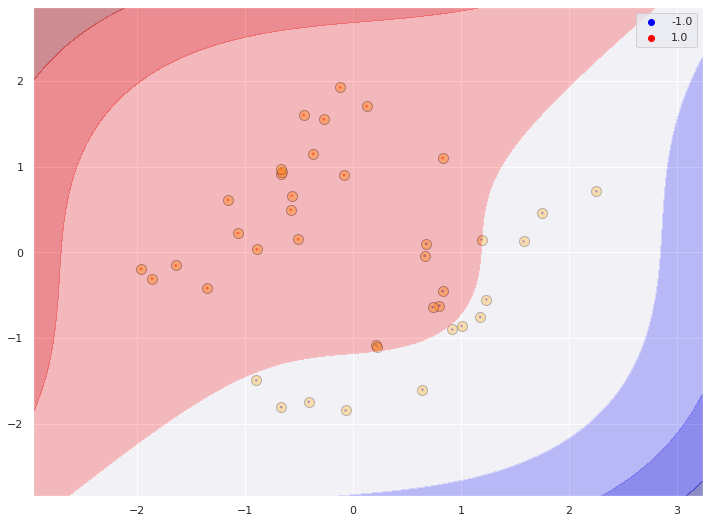

In [50]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 3, kernel = 'poly')
plot_svm_2d(grid, X_test, Y_test)

     pcost       dcost       gap    pres   dres
 0: -1.4358e+01 -1.8058e+01  7e+02  3e+01  4e-15
 1: -2.0968e+00 -1.6845e+01  4e+01  1e+00  4e-15
 2: -1.1176e+00 -6.5901e+00  6e+00  6e-02  7e-16
 3: -1.2702e+00 -2.1761e+00  1e+00  8e-03  1e-15
 4: -1.4376e+00 -1.7464e+00  3e-01  2e-03  6e-16
 5: -1.5047e+00 -1.5962e+00  1e-01  6e-04  5e-16
 6: -1.5271e+00 -1.5516e+00  3e-02  8e-05  5e-16
 7: -1.5364e+00 -1.5382e+00  2e-03  3e-06  6e-16
 8: -1.5372e+00 -1.5372e+00  2e-05  3e-08  7e-16
 9: -1.5372e+00 -1.5372e+00  2e-07  3e-10  6e-16
10: -1.5372e+00 -1.5372e+00  2e-09  3e-12  6e-16
11: -1.5372e+00 -1.5372e+00  2e-11  3e-14  6e-16
Optimal solution found.


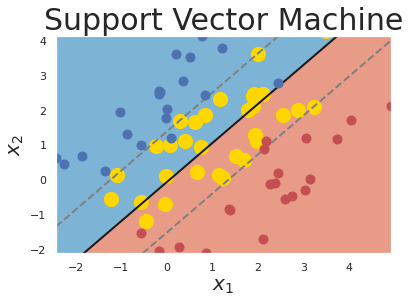

In [51]:
kernel=str('polynomial')
C=float(grid.best_params_['SupVM__C'])
gamma=float(grid.best_params_['SupVM__gamma'])
degree = int(grid.best_params_['SupVM__degree'])

model = SVM(kernel, gamma, C, degree) 
model.fit(X_train, Y_train)    
plot_svm(X_test, Y_test, model)

### lineal

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'linear', 'SupVM__gamma': 0.07, 'SupVM__degree': 2, 'SupVM__C': 0.5}
              precision  recall  f1-score  support
-1.0           0.952381   1.000  0.975610   20.000
1.0            1.000000   0.950  0.974359   20.000
accuracy       0.975000   0.975  0.975000    0.975
macro avg      0.976190   0.975  0.974984   40.000
weighted avg   0.976190   0.975  0.974984   40.000
[[20  0]
 [ 1 19]]


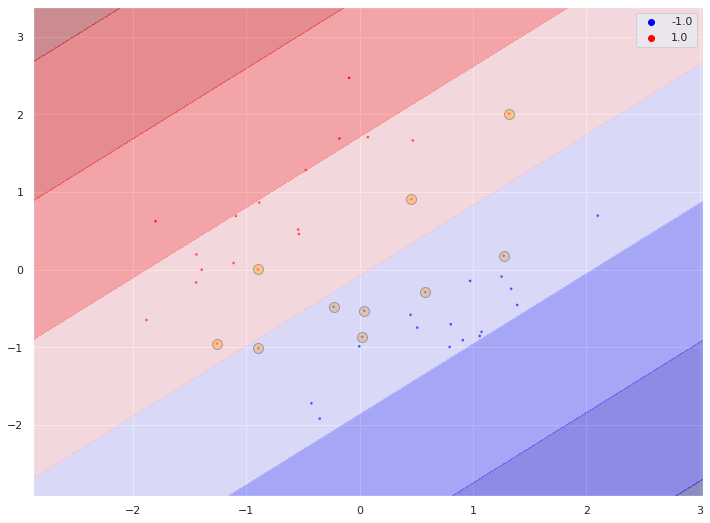

In [52]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 10, kernel = 'linear')
plot_svm_2d(grid, X_test, Y_test)

     pcost       dcost       gap    pres   dres
 0: -1.3017e+01 -1.7946e+01  7e+02  3e+01  3e-15
 1: -1.9209e+00 -1.6723e+01  4e+01  1e+00  4e-15
 2: -1.0038e+00 -6.5139e+00  7e+00  6e-02  9e-16
 3: -1.1275e+00 -2.0571e+00  1e+00  8e-03  2e-15
 4: -1.3078e+00 -1.5634e+00  3e-01  2e-03  8e-16
 5: -1.3425e+00 -1.4853e+00  1e-01  8e-04  6e-16
 6: -1.3721e+00 -1.4237e+00  5e-02  2e-04  5e-16
 7: -1.3863e+00 -1.3993e+00  1e-02  5e-05  5e-16
 8: -1.3902e+00 -1.3928e+00  3e-03  9e-06  6e-16
 9: -1.3912e+00 -1.3913e+00  9e-05  2e-07  7e-16
10: -1.3912e+00 -1.3912e+00  9e-07  2e-09  6e-16
11: -1.3912e+00 -1.3912e+00  9e-09  2e-11  8e-16
12: -1.3912e+00 -1.3912e+00  9e-11  2e-13  6e-16
Optimal solution found.


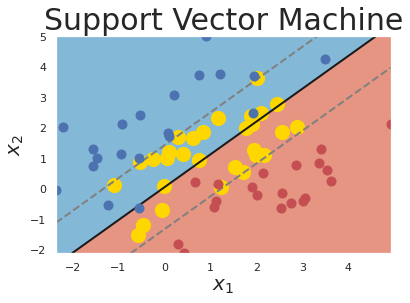

In [53]:
kernel=str('linear')
C=float(grid.best_params_['SupVM__C'])
gamma=float(grid.best_params_['SupVM__gamma'])
degree = int(grid.best_params_['SupVM__degree'])

model = SVM(kernel, gamma, C, degree) 
model.fit(X_train, Y_train)    
plot_svm(X_test, Y_test, model)

### rbf

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'rbf', 'SupVM__gamma': 0.5, 'SupVM__degree': 1, 'SupVM__C': 40}
              precision  recall  f1-score  support
-1.0                1.0     1.0       1.0     20.0
1.0                 1.0     1.0       1.0     20.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     40.0
weighted avg        1.0     1.0       1.0     40.0
[[20  0]
 [ 0 20]]


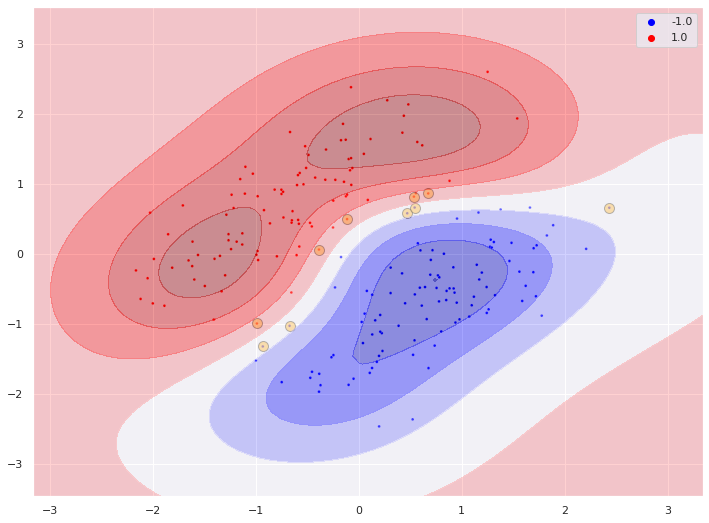

In [63]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 10, kernel = 'rbf')
plot_svm_2d(grid, x, y)

     pcost       dcost       gap    pres   dres
 0: -5.8330e+01 -1.4622e+02  9e+01  2e-14  2e+00
 1: -6.9366e+01 -7.4353e+01  5e+00  2e-14  2e-01
 2: -7.2735e+01 -7.3710e+01  1e+00  3e-14  3e-02
 3: -7.2840e+01 -7.2905e+01  7e-02  3e-14  1e-03
 4: -7.2849e+01 -7.2851e+01  2e-03  6e-15  2e-05
 5: -7.2849e+01 -7.2850e+01  7e-05  2e-14  4e-07
 6: -7.2849e+01 -7.2849e+01  1e-06  6e-15  4e-09
 7: -7.2849e+01 -7.2849e+01  1e-08  9e-15  4e-11
 8: -7.2849e+01 -7.2849e+01  1e-10  1e-14  4e-13
Optimal solution found.


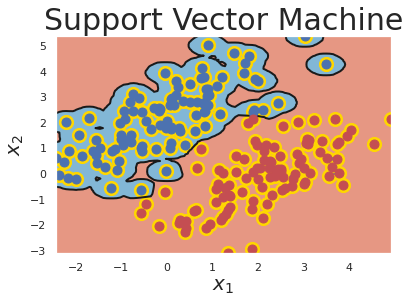

In [69]:
kernel=str('gaussian')
C=float(grid.best_params_['SupVM__C'])
gamma=float(grid.best_params_['SupVM__gamma'])
degree = int(grid.best_params_['SupVM__degree'])

model = SVM(kernel, gamma, C, degree) 
model.fit(x, y)    
plot_svm(x, y, model)

### best of all

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'linear', 'SupVM__gamma': 5, 'SupVM__degree': 1, 'SupVM__C': 30}
              precision  recall  f1-score  support
-1.0                1.0     1.0       1.0     20.0
1.0                 1.0     1.0       1.0     20.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     40.0
weighted avg        1.0     1.0       1.0     40.0
[[20  0]
 [ 0 20]]


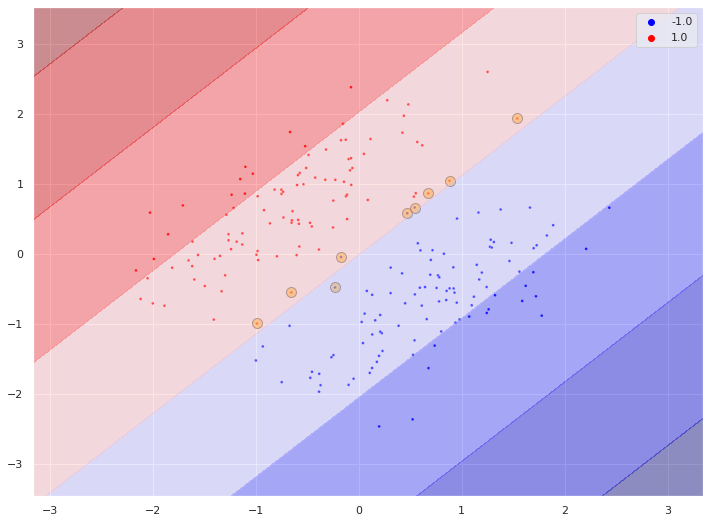

In [73]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 3, kernel = 'all')
plot_svm_2d(grid, x, y)

     pcost       dcost       gap    pres   dres
 0: -8.7616e+01 -3.8768e+03  1e+04  1e+00  4e-14
 1: -4.6062e+01 -1.0741e+03  2e+03  8e-02  4e-14
 2: -2.1474e+01 -1.7238e+02  2e+02  1e-02  2e-14
 3: -2.7442e+01 -6.2590e+01  4e+01  1e-03  3e-14
 4: -3.1521e+01 -5.6541e+01  3e+01  7e-04  2e-14
 5: -3.1411e+01 -5.3283e+01  2e+01  4e-04  2e-14
 6: -3.3599e+01 -4.8270e+01  2e+01  3e-04  2e-14
 7: -3.2854e+01 -4.7634e+01  2e+01  2e-04  2e-14
 8: -3.4221e+01 -4.4510e+01  1e+01  1e-04  2e-14
 9: -3.5306e+01 -4.2209e+01  7e+00  1e-14  2e-14
10: -3.6876e+01 -3.9700e+01  3e+00  2e-14  2e-14
11: -3.8042e+01 -3.8332e+01  3e-01  1e-14  2e-14
12: -3.8184e+01 -3.8187e+01  3e-03  2e-14  2e-14
13: -3.8185e+01 -3.8185e+01  3e-05  2e-14  2e-14
14: -3.8185e+01 -3.8185e+01  3e-07  6e-15  2e-14
15: -3.8185e+01 -3.8185e+01  3e-09  8e-15  2e-14
Optimal solution found.


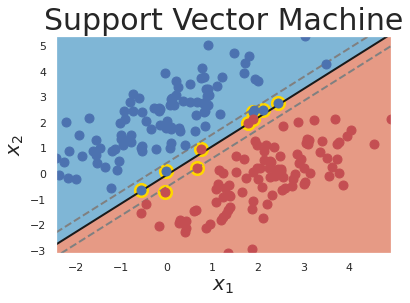

In [79]:
kernel=str('linear')
C=float(grid.best_params_['SupVM__C'])
gamma=float(grid.best_pa rams_['SupVM__gamma'])
degree = int(grid.best_params_['SupVM__degree'])

model = SVM(kernel, gamma, C, degree) 
model.fit(x, y)    
plot_svm(x, y, model)

## Problema 2

In [84]:

from sklearn.datasets import make_moons
x, y = make_moons(200, noise=0.2)
y = np.asanyarray(y, dtype=np.float64)
y += (y==0) * - 1.0

<AxesSubplot:>

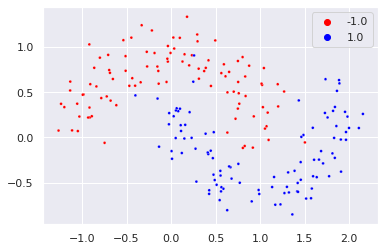

In [85]:
sns.scatterplot(x=x[:, 0], 
                y=x[:, 1], 
                hue=y, 
                s=8,
                palette=['red','blue']
                )

### sigmoid

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'sigmoid', 'SupVM__gamma': 0.05, 'SupVM__degree': 5, 'SupVM__C': 0.1}
              precision  recall  f1-score  support
-1.0           1.000000   0.950  0.974359   20.000
1.0            0.952381   1.000  0.975610   20.000
accuracy       0.975000   0.975  0.975000    0.975
macro avg      0.976190   0.975  0.974984   40.000
weighted avg   0.976190   0.975  0.974984   40.000
[[19  1]
 [ 0 20]]


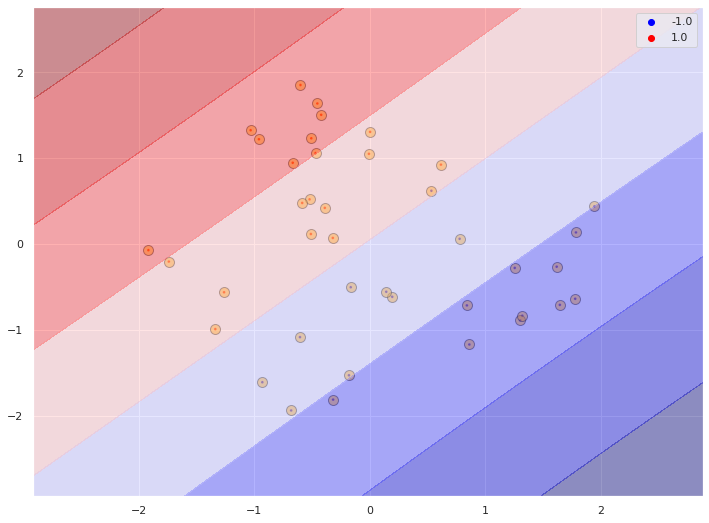

In [33]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 20, kernel = 'sigmoid')
plot_svm_2d(grid,X_test, Y_test)

### linear

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'linear', 'SupVM__gamma': 0.005, 'SupVM__degree': 4, 'SupVM__C': 0.1}
              precision  recall  f1-score  support
-1.0           0.809524   0.850  0.829268   20.000
1.0            0.842105   0.800  0.820513   20.000
accuracy       0.825000   0.825  0.825000    0.825
macro avg      0.825815   0.825  0.824891   40.000
weighted avg   0.825815   0.825  0.824891   40.000
[[17  3]
 [ 4 16]]


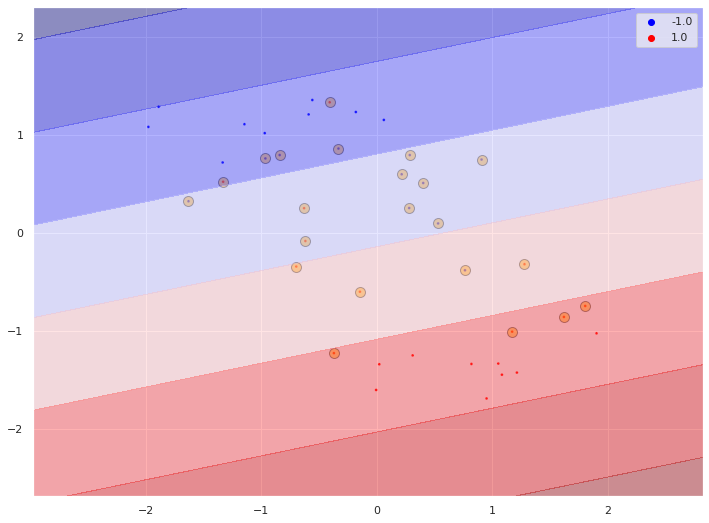

In [90]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 10, kernel = 'linear')
plot_svm_2d(grid, X_test, Y_test)

     pcost       dcost       gap    pres   dres
 0: -3.2492e+01 -2.2624e+00  1e+03  3e+01  1e-15
 1: -1.5145e+00 -2.1894e+00  2e+01  6e-01  1e-15
 2: -5.8800e-01 -1.7468e+00  1e+00  9e-03  8e-16
 3: -6.1226e-01 -7.6881e-01  2e-01  1e-03  5e-16
 4: -6.6209e-01 -6.7175e-01  1e-02  3e-05  5e-16
 5: -6.6765e-01 -6.6778e-01  1e-04  4e-07  5e-16
 6: -6.6773e-01 -6.6774e-01  1e-06  4e-09  5e-16
 7: -6.6774e-01 -6.6774e-01  1e-08  4e-11  5e-16
 8: -6.6774e-01 -6.6774e-01  1e-10  4e-13  4e-16
 9: -6.6774e-01 -6.6774e-01  1e-12  4e-15  4e-16
Optimal solution found.


/home/nacho/Documents/AI2/actividad_07/plotting.py:22: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, zz, [-1.0, 1.0], colors='grey',


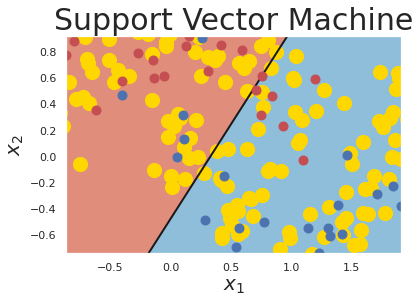

In [91]:
kernel=str('linear')
C=float(grid.best_params_['SupVM__C'])
gamma=float(grid.best_params_['SupVM__gamma'])
degree = int(grid.best_params_['SupVM__degree'])

model = SVM(kernel, gamma, C, degree) 
model.fit(X_train, Y_train)    
plot_svm(X_test, Y_test, model)

### poly

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'poly', 'SupVM__gamma': 0.5, 'SupVM__degree': 5, 'SupVM__C': 1000}
              precision  recall  f1-score  support
-1.0           1.000000   0.650  0.787879   20.000
1.0            0.740741   1.000  0.851064   20.000
accuracy       0.825000   0.825  0.825000    0.825
macro avg      0.870370   0.825  0.819471   40.000
weighted avg   0.870370   0.825  0.819471   40.000
[[13  7]
 [ 0 20]]


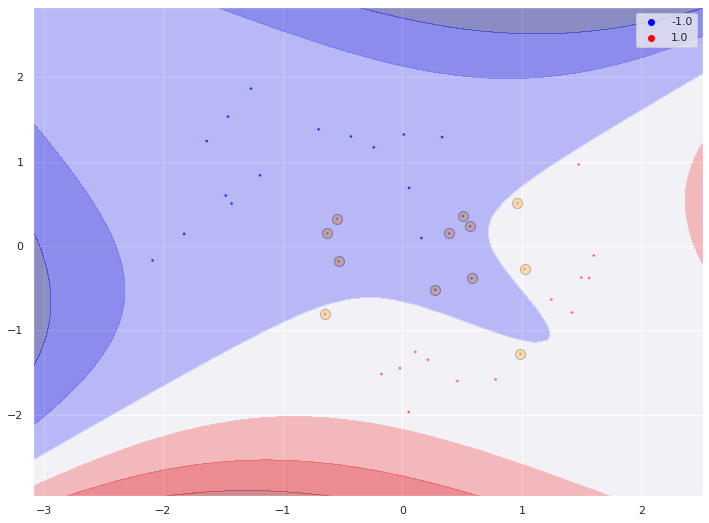

In [92]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 5, kernel = 'poly')
plot_svm_2d(grid, X_test, Y_test)

     pcost       dcost       gap    pres   dres
 0: -2.5669e+01 -1.6956e+02  1e+03  5e+00  9e-14
 1: -1.6129e+01 -1.3041e+02  3e+02  8e-01  6e-14
 2: -1.3441e+01 -6.9589e+01  9e+01  2e-01  8e-14
 3: -1.2122e+01 -3.2528e+01  3e+01  5e-02  3e-14
 4: -1.2401e+01 -2.0552e+01  1e+01  2e-02  2e-14
 5: -1.2796e+01 -1.6326e+01  4e+00  6e-03  2e-14
 6: -1.3303e+01 -1.4244e+01  1e+00  1e-03  2e-14
 7: -1.3535e+01 -1.3710e+01  2e-01  1e-04  2e-14
 8: -1.3597e+01 -1.3606e+01  9e-03  2e-06  2e-14
 9: -1.3601e+01 -1.3602e+01  1e-03  2e-07  2e-14
10: -1.3601e+01 -1.3601e+01  2e-05  3e-09  2e-14
11: -1.3601e+01 -1.3601e+01  2e-07  3e-11  1e-14
12: -1.3601e+01 -1.3601e+01  2e-09  3e-13  1e-14
13: -1.3601e+01 -1.3601e+01  2e-11  3e-15  2e-14
Optimal solution found.


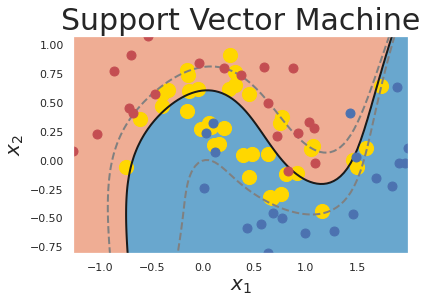

In [93]:
kernel=str('polynomial')
C=float(grid.best_params_['SupVM__C'])
gamma=float(grid.best_params_['SupVM__gamma'])
degree = int(grid.best_params_['SupVM__degree'])

model = SVM(kernel, gamma, C, degree) 
model.fit(X_train, Y_train)    
plot_svm(X_test, Y_test, model)

### rbf

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'rbf', 'SupVM__gamma': 5, 'SupVM__degree': 4, 'SupVM__C': 10}
              precision  recall  f1-score  support
-1.0                0.9     0.9       0.9     20.0
1.0                 0.9     0.9       0.9     20.0
accuracy            0.9     0.9       0.9      0.9
macro avg           0.9     0.9       0.9     40.0
weighted avg        0.9     0.9       0.9     40.0
[[18  2]
 [ 2 18]]


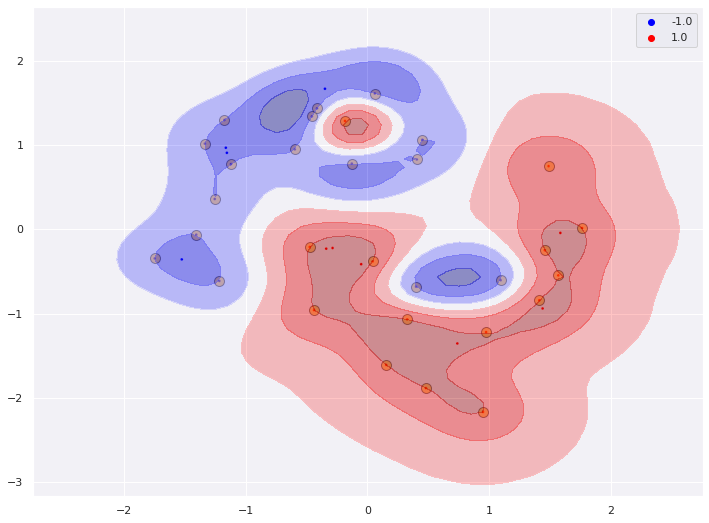

In [94]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 10, kernel = 'rbf')
plot_svm_2d(grid, X_test, Y_test)

     pcost       dcost       gap    pres   dres
 0: -1.6143e+01 -5.9461e+01  4e+02  1e+01  2e+00
 1: -1.3243e+01 -7.4888e+01  1e+02  2e+00  4e-01
 2: -1.8528e+01 -6.7419e+01  6e+01  1e+00  2e-01
 3: -2.8423e+01 -4.3903e+01  2e+01  2e-01  4e-02
 4: -3.2799e+01 -3.6541e+01  4e+00  3e-02  4e-03
 5: -3.4467e+01 -3.5204e+01  7e-01  1e-03  2e-04
 6: -3.4863e+01 -3.5005e+01  1e-01  4e-05  7e-06
 7: -3.4944e+01 -3.4968e+01  2e-02  1e-06  2e-07
 8: -3.4960e+01 -3.4962e+01  1e-03  6e-08  1e-08
 9: -3.4961e+01 -3.4961e+01  3e-05  8e-10  1e-10
10: -3.4961e+01 -3.4961e+01  1e-06  9e-12  1e-12
11: -3.4961e+01 -3.4961e+01  9e-08  8e-14  1e-14
12: -3.4961e+01 -3.4961e+01  4e-09  5e-15  8e-16
13: -3.4961e+01 -3.4961e+01  4e-11  8e-15  8e-16
Optimal solution found.


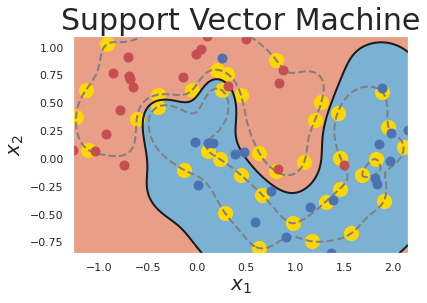

In [95]:
kernel=str('gaussian')
C=float(grid.best_params_['SupVM__C'])
gamma=float(grid.best_params_['SupVM__gamma'])
degree = int(grid.best_params_['SupVM__degree'])

model = SVM(kernel, gamma, C, degree) 
model.fit(X_train, Y_train)    
plot_svm(X_test, Y_test, model)

### best of all

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best-Fit Parameters From Training Data:
 {'SupVM__kernel': 'linear', 'SupVM__gamma': 0.005, 'SupVM__degree': 1, 'SupVM__C': 75}
              precision  recall  f1-score  support
-1.0               0.85    0.85      0.85    20.00
1.0                0.85    0.85      0.85    20.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.85    0.85      0.85    40.00
weighted avg       0.85    0.85      0.85    40.00
[[17  3]
 [ 3 17]]


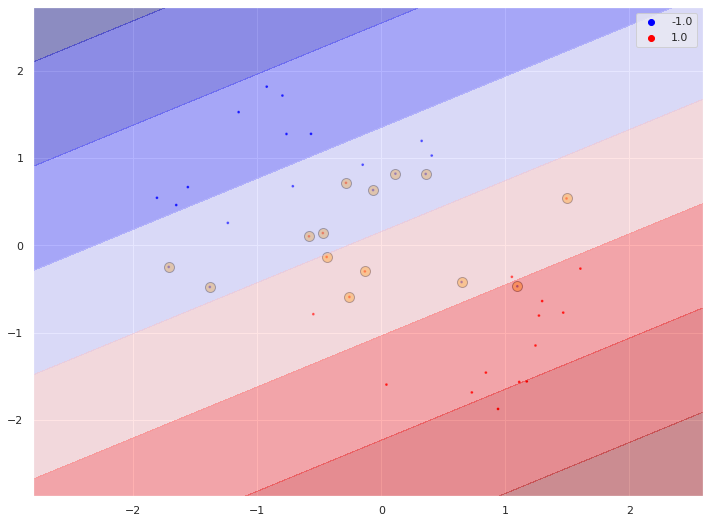

In [99]:
grid, grid_report, X_train, X_test, Y_train, Y_test = gridsearchcv(x,y,scoring = 'f1_macro', n_iter = 3, kernel = 'all')
plot_svm_2d(grid, X_test, Y_test)

     pcost       dcost       gap    pres   dres
 0: -3.2685e+01 -2.3882e+00  1e+03  3e+01  1e-15
 1: -1.6150e+00 -2.3004e+00  2e+01  7e-01  1e-15
 2: -6.0191e-01 -1.8172e+00  2e+00  1e-02  1e-15
 3: -6.2116e-01 -8.4710e-01  2e-01  2e-03  6e-16
 4: -6.7459e-01 -6.8944e-01  2e-02  7e-05  4e-16
 5: -6.8241e-01 -6.8262e-01  2e-04  8e-07  5e-16
 6: -6.8253e-01 -6.8254e-01  2e-06  8e-09  4e-16
 7: -6.8254e-01 -6.8254e-01  2e-08  8e-11  5e-16
 8: -6.8254e-01 -6.8254e-01  2e-10  8e-13  4e-16
 9: -6.8254e-01 -6.8254e-01  2e-12  8e-15  4e-16
Optimal solution found.


/home/nacho/Documents/AI2/actividad_07/plotting.py:22: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, zz, [-1.0, 1.0], colors='grey',


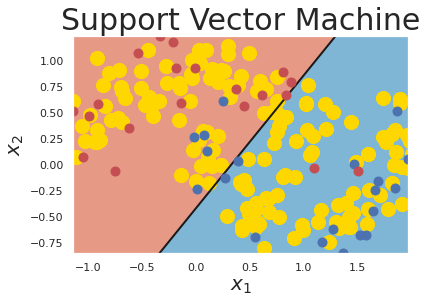

In [100]:
kernel=str('linear')
C=float(grid.best_params_['SupVM__C'])
gamma=float(grid.best_params_['SupVM__gamma'])
degree = int(grid.best_params_['SupVM__degree'])

model = SVM(kernel, gamma, C, degree) 
model.fit(X_train, Y_train)    
plot_svm(X_test, Y_test, model)